<a href="https://colab.research.google.com/github/sahilr005/ml/blob/main/Game_WIn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [196]:
# import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [6]:
# read Dataset

pd.set_option("display.max_columns",None)
data = pd.read_csv("pubg.csv")
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0.0,0.0,0.00,0.0,0.0,0.0,60.0,1241.0,0.0,0.0,0.00,1306.0,squad-fpp,28.0,26.0,-1.0,0.0,0.0000,0.0,0.00,0.0,0.0,244.80,1.0,1466.0,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0.0,0.0,91.47,0.0,0.0,0.0,57.0,0.0,0.0,0.0,0.00,1777.0,squad-fpp,26.0,25.0,1484.0,0.0,0.0045,0.0,11.04,0.0,0.0,1434.00,5.0,0.0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1.0,0.0,68.00,0.0,0.0,0.0,47.0,0.0,0.0,0.0,0.00,1318.0,duo,50.0,47.0,1491.0,0.0,0.0000,0.0,0.00,0.0,0.0,161.80,2.0,0.0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0.0,0.0,32.90,0.0,0.0,0.0,75.0,0.0,0.0,0.0,0.00,1436.0,squad-fpp,31.0,30.0,1408.0,0.0,0.0000,0.0,0.00,0.0,0.0,202.70,3.0,0.0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0.0,0.0,100.00,0.0,0.0,0.0,45.0,0.0,1.0,1.0,58.53,1424.0,solo-fpp,97.0,95.0,1560.0,0.0,0.0000,0.0,0.00,0.0,0.0,49.75,2.0,0.0,0.1875


In [7]:
data.shape

(28274, 29)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28274 entries, 0 to 28273
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               28274 non-null  object 
 1   groupId          28274 non-null  object 
 2   matchId          28273 non-null  object 
 3   assists          28273 non-null  float64
 4   boosts           28273 non-null  float64
 5   damageDealt      28273 non-null  float64
 6   DBNOs            28273 non-null  float64
 7   headshotKills    28273 non-null  float64
 8   heals            28273 non-null  float64
 9   killPlace        28273 non-null  float64
 10  killPoints       28273 non-null  float64
 11  kills            28273 non-null  float64
 12  killStreaks      28273 non-null  float64
 13  longestKill      28273 non-null  float64
 14  matchDuration    28273 non-null  float64
 15  matchType        28273 non-null  object 
 16  maxPlace         28273 non-null  float64
 17  numGroups   

In [9]:
# null value check

data.isnull().sum()

Id                 0
groupId            0
matchId            1
assists            1
boosts             1
damageDealt        1
DBNOs              1
headshotKills      1
heals              1
killPlace          1
killPoints         1
kills              1
killStreaks        1
longestKill        1
matchDuration      1
matchType          1
maxPlace           1
numGroups          1
rankPoints         1
revives            1
rideDistance       1
roadKills          1
swimDistance       1
teamKills          1
vehicleDestroys    1
walkDistance       1
weaponsAcquired    1
winPoints          1
winPlacePerc       1
dtype: int64

In [10]:
# only one data is null so it's removed
data.dropna(inplace=True)

data["matchType"].value_counts()

squad-fpp           11109
duo-fpp              6460
squad                4014
solo-fpp             3406
duo                  1965
solo                 1101
normal-squad-fpp      102
crashfpp               50
normal-duo-fpp         32
flaretpp               12
normal-solo-fpp        10
flarefpp                7
normal-squad            3
normal-duo              1
crashtpp                1
Name: matchType, dtype: int64

In [11]:
# removed unwanted data

data.drop(["Id","groupId","matchId"],axis=1,inplace=True)

In [12]:
# Convert object data to int

encode = LabelEncoder()
data["matchType"] = encode.fit_transform(data["matchType"])

In [13]:
data.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,28273.000000,28273.000000,28273.000000,28273.000000,28273.000000,28273.000000,28273.000000,28273.000000,28273.000000,28273.000000,28273.000000,28273.000000,28273.000000,28273.000000,28273.000000,28273.000000,28273.000000,28273.000000,28273.000000,28273.000000,28273.000000,28273.000000,28273.000000,28273.000000,28273.000000,28273.000000
mean,0.234959,1.133378,130.991348,0.663354,0.224065,1.380328,47.390655,508.594808,0.927776,0.548545,22.703347,1577.495667,10.096099,44.405369,42.915891,886.883139,0.163973,609.767937,0.003325,4.550483,0.024546,0.007887,1162.141377,3.681392,611.518799,0.475613
std,0.582904,1.734276,169.609968,1.155341,0.581366,2.675301,27.436504,627.404446,1.545967,0.718510,49.446565,258.041807,4.892065,23.684775,23.155229,738.124776,0.465407,1490.926405,0.077014,31.926518,0.171440,0.090829,1182.695784,2.393708,740.341363,0.307237
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,312.000000,0.000000,3.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,1366.000000,3.000000,28.000000,27.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,160.400000,2.000000,0.000000,0.204100
50%,0.000000,0.000000,83.080000,0.000000,0.000000,0.000000,47.000000,0.000000,0.000000,0.000000,0.000000,1436.000000,13.000000,30.000000,30.000000,1444.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,708.900000,3.000000,0.000000,0.464300
75%,0.000000,2.000000,186.500000,1.000000,0.000000,2.000000,71.000000,1175.000000,1.000000,1.000000,21.630000,1849.000000,14.000000,49.000000,47.000000,1500.000000,0.000000,6.892000,0.000000,0.000000,0.000000,0.000000,1968.000000,5.000000,1495.000000,0.744200
max,9.000000,14.000000,2856.000000,32.000000,9.000000,47.000000,100.000000,2069.000000,24.000000,7.000000,624.200000,2217.000000,14.000000,100.000000,100.000000,5289.000000,8.000000,17210.000000,5.000000,1220.000000,4.000000,2.000000,13530.000000,43.000000,1906.000000,1.000000


In [203]:
# Corelation between depandend value & target value
 
data.corr()["winPlacePerc"].sort_values(ascending=False)

winPlacePerc       1.000000
walkDistance       0.813182
boosts             0.635976
weaponsAcquired    0.610616
damageDealt        0.448110
heals              0.435210
kills              0.428218
longestKill        0.410097
killStreaks        0.374825
rideDistance       0.340754
assists            0.303217
headshotKills      0.284042
DBNOs              0.281449
revives            0.243353
swimDistance       0.145808
vehicleDestroys    0.071167
numGroups          0.044832
maxPlace           0.041426
roadKills          0.031206
teamKills          0.020691
rankPoints         0.015522
killPoints         0.009938
winPoints          0.005789
matchDuration     -0.002300
matchType         -0.031165
killPlace         -0.717421
Name: winPlacePerc, dtype: float64

# EDA & Feature Enginering

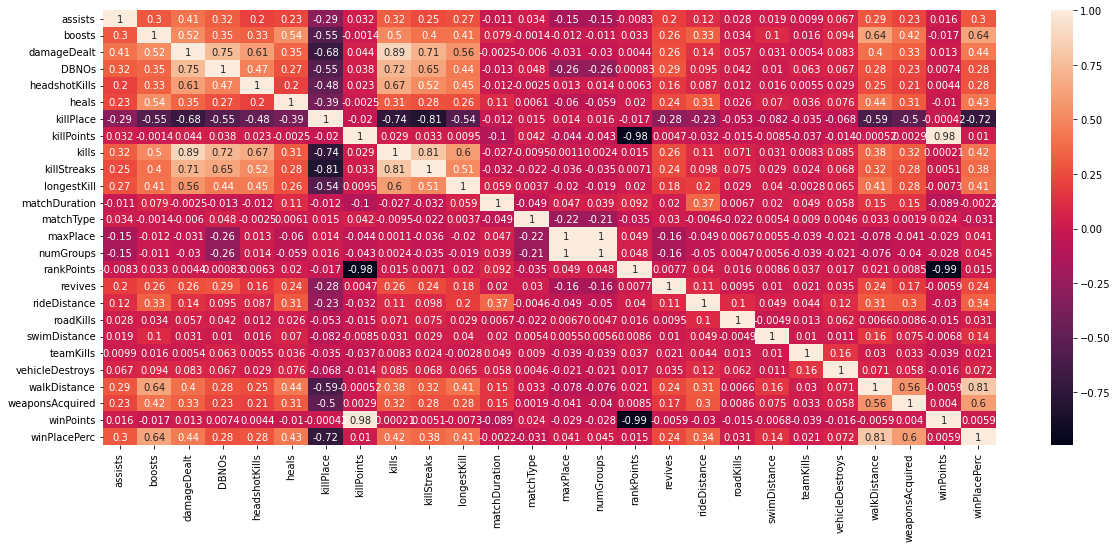

In [56]:
plt.figure(figsize=(20,8))
sns.heatmap(data.corr(),annot=True)

**Data Divid**

In [122]:
continue_data = []
discrete_data = []
for i in data.columns:
  if len(data[i].unique()) >20:
    continue_data.append(data[i])
  else:
    discrete_data.append(data[i])

In [125]:
continue_data = pd.DataFrame(continue_data).T
discrete_data = pd.DataFrame(discrete_data).T

In [103]:
continue_data.head(2)

,damageDealt,heals,killPlace,killPoints,kills,longestKill,matchDuration,maxPlace,numGroups,rankPoints,rideDistance,swimDistance,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0.00,0.0,60.0,1241.0,0.0,0.0,1306.0,28.0,26.0,-1.0,0.0000,0.00,244.8,1.0,1466.0,0.4444
1,91.47,0.0,57.0,0.0,0.0,0.0,1777.0,26.0,25.0,1484.0,0.0045,11.04,1434.0,5.0,0.0,0.6400


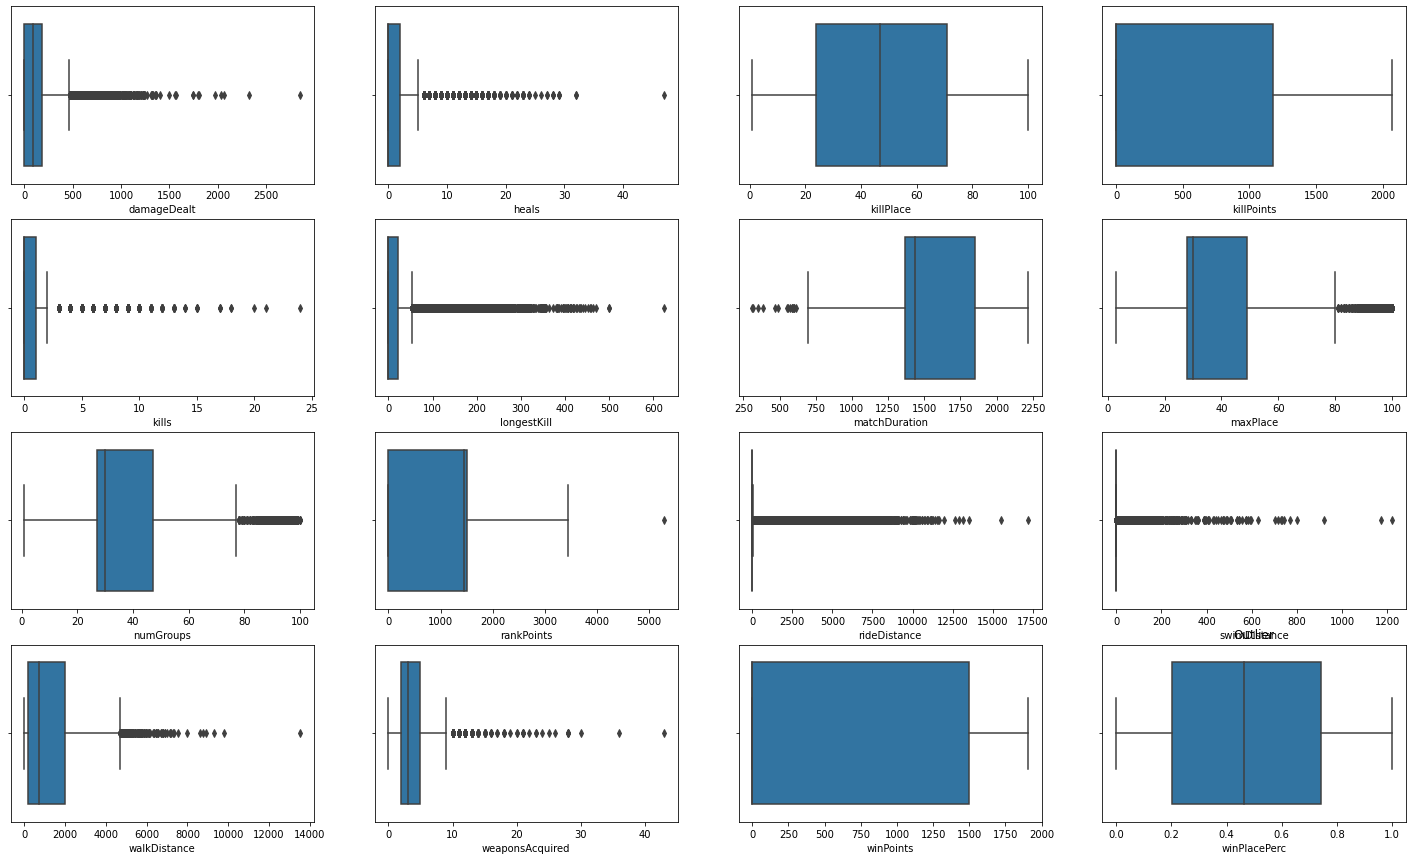

In [120]:
plt.figure(figsize=(25,15))
for i in range(len(continue_data.columns)):
  plt.subplot(4, 4, i + 1)
  sns.boxplot(data[continue_data.columns[i]])
plt.show()

- damageDealt, heals, longestKill, rankPoints data has outliers

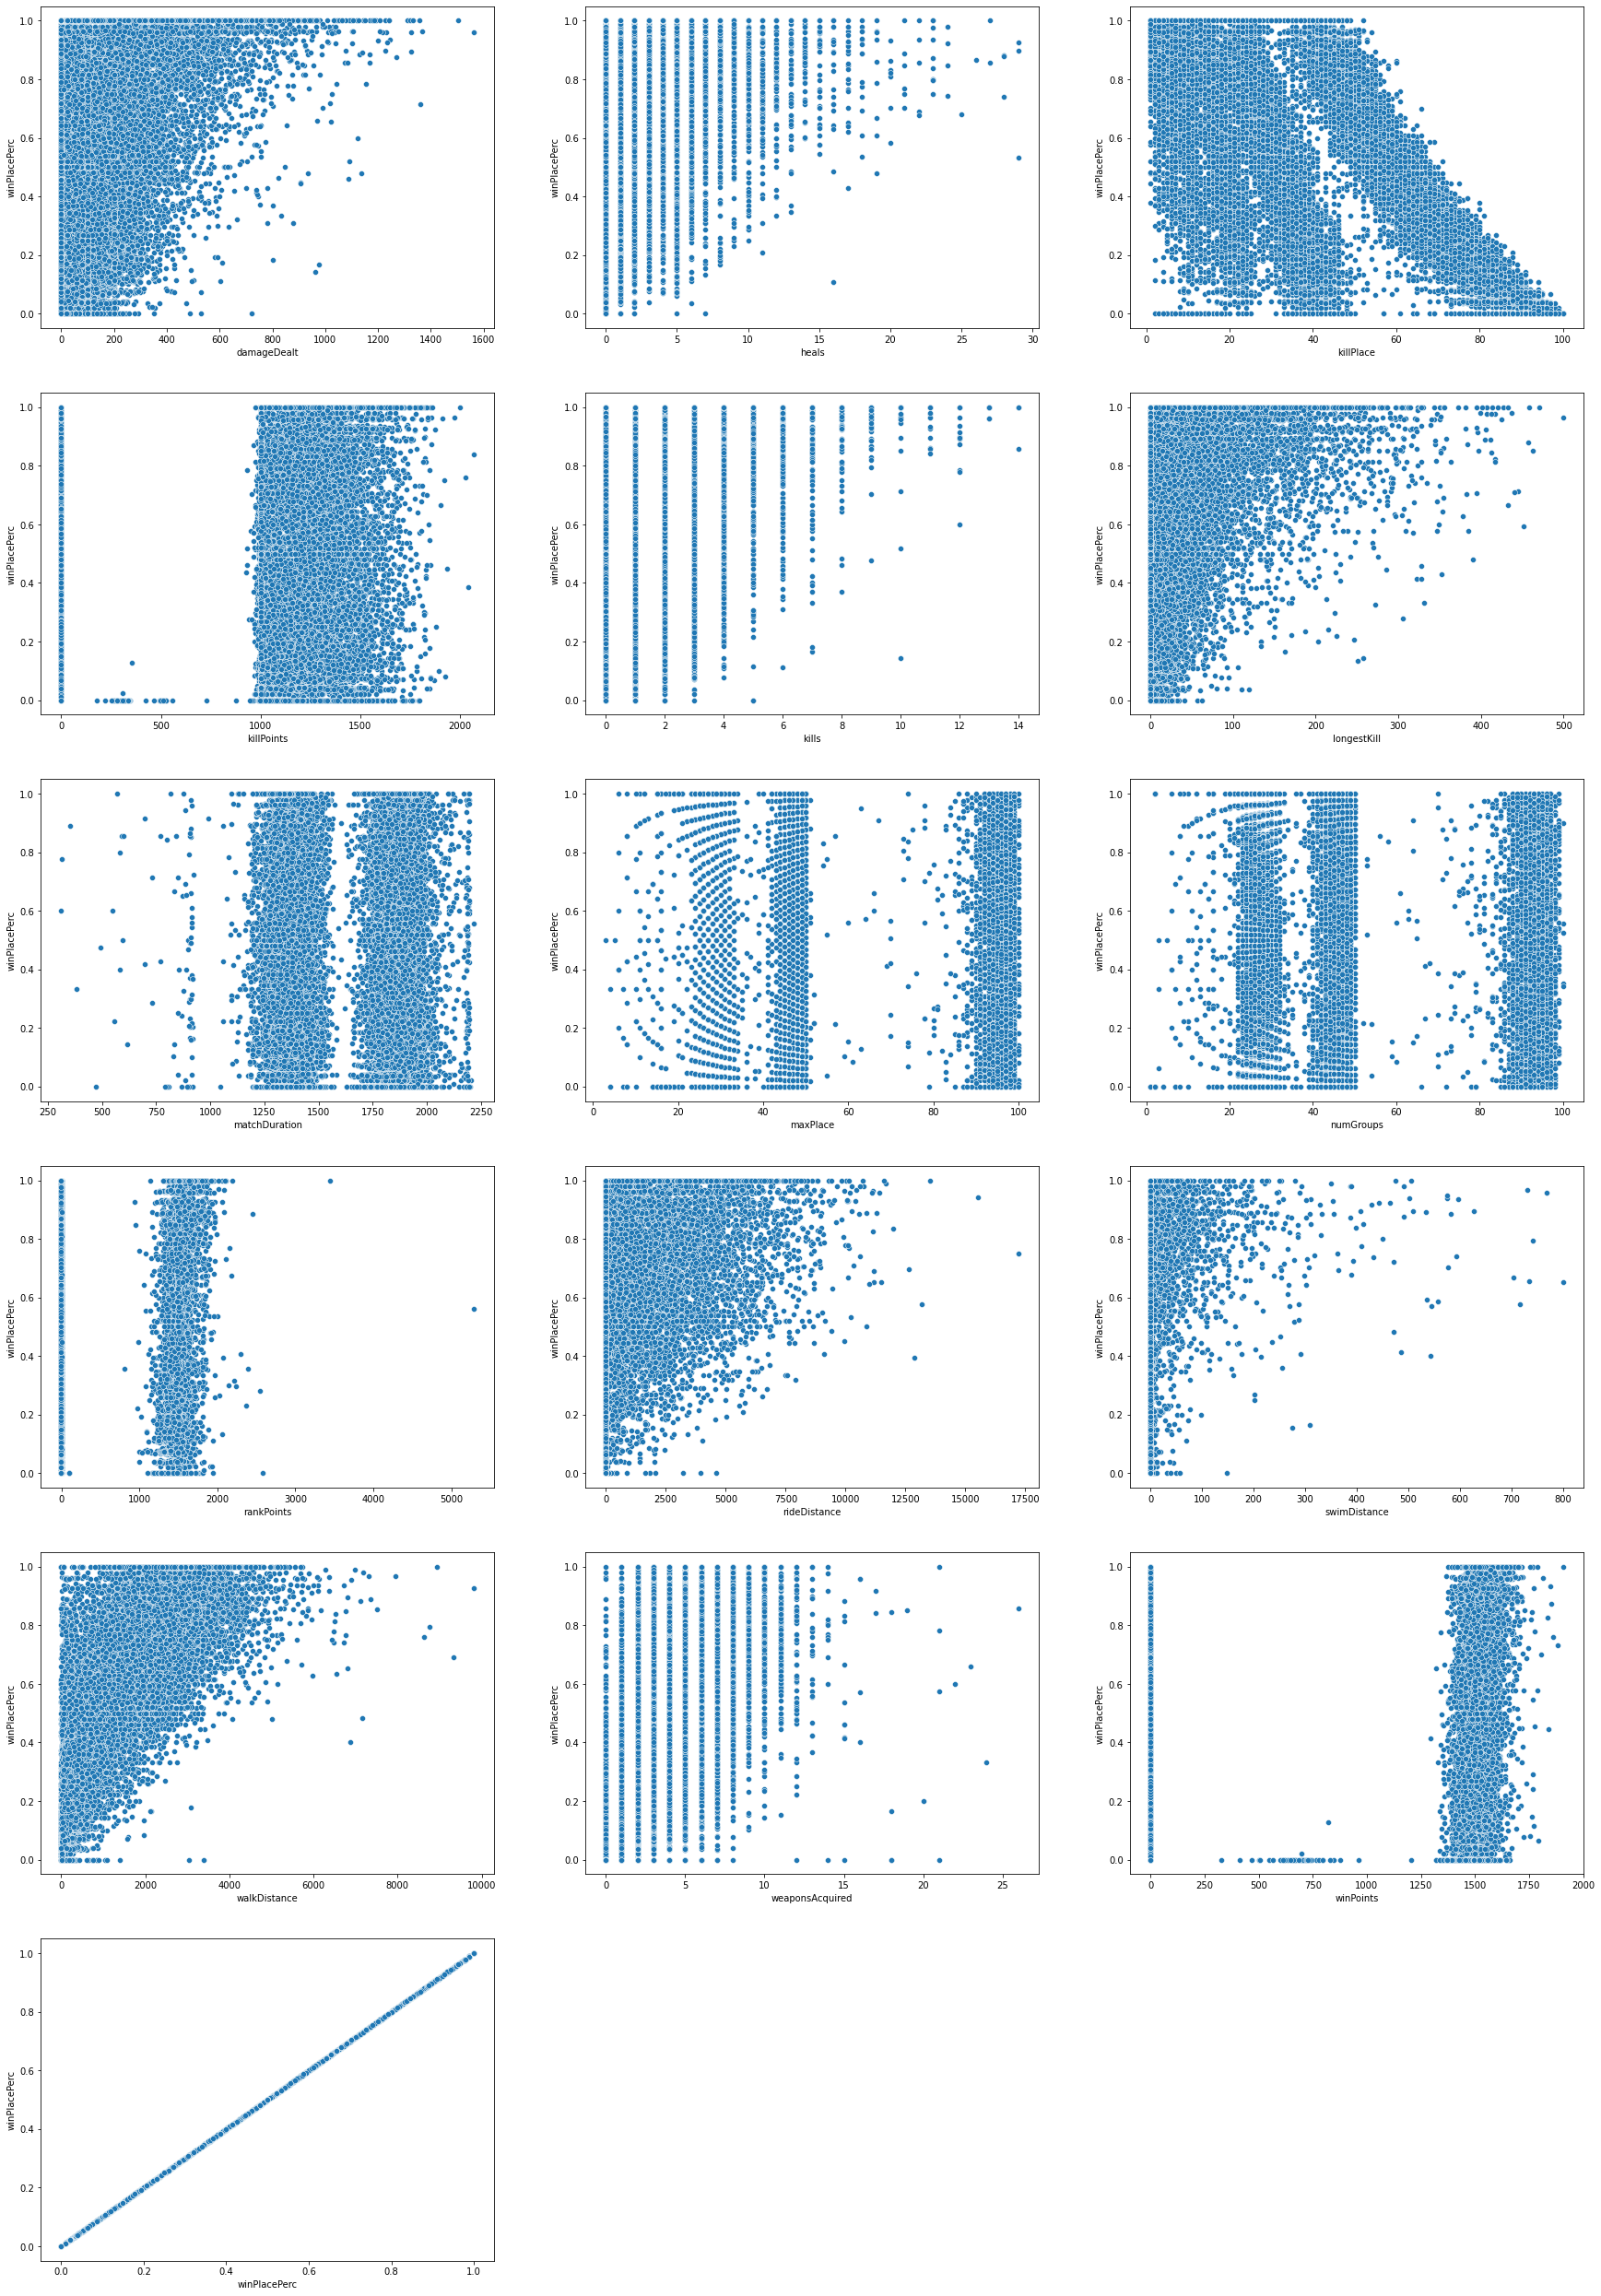

In [164]:
# Probability between continue valu & target value

plt.figure(figsize=(30,45))
for i in range(len(continue_data.columns)):
  plt.subplot(6, 3, i + 1)
  sns.scatterplot(x =data[continue_data.columns[i]], y = data["winPlacePerc"])
plt.show()

Discrete data

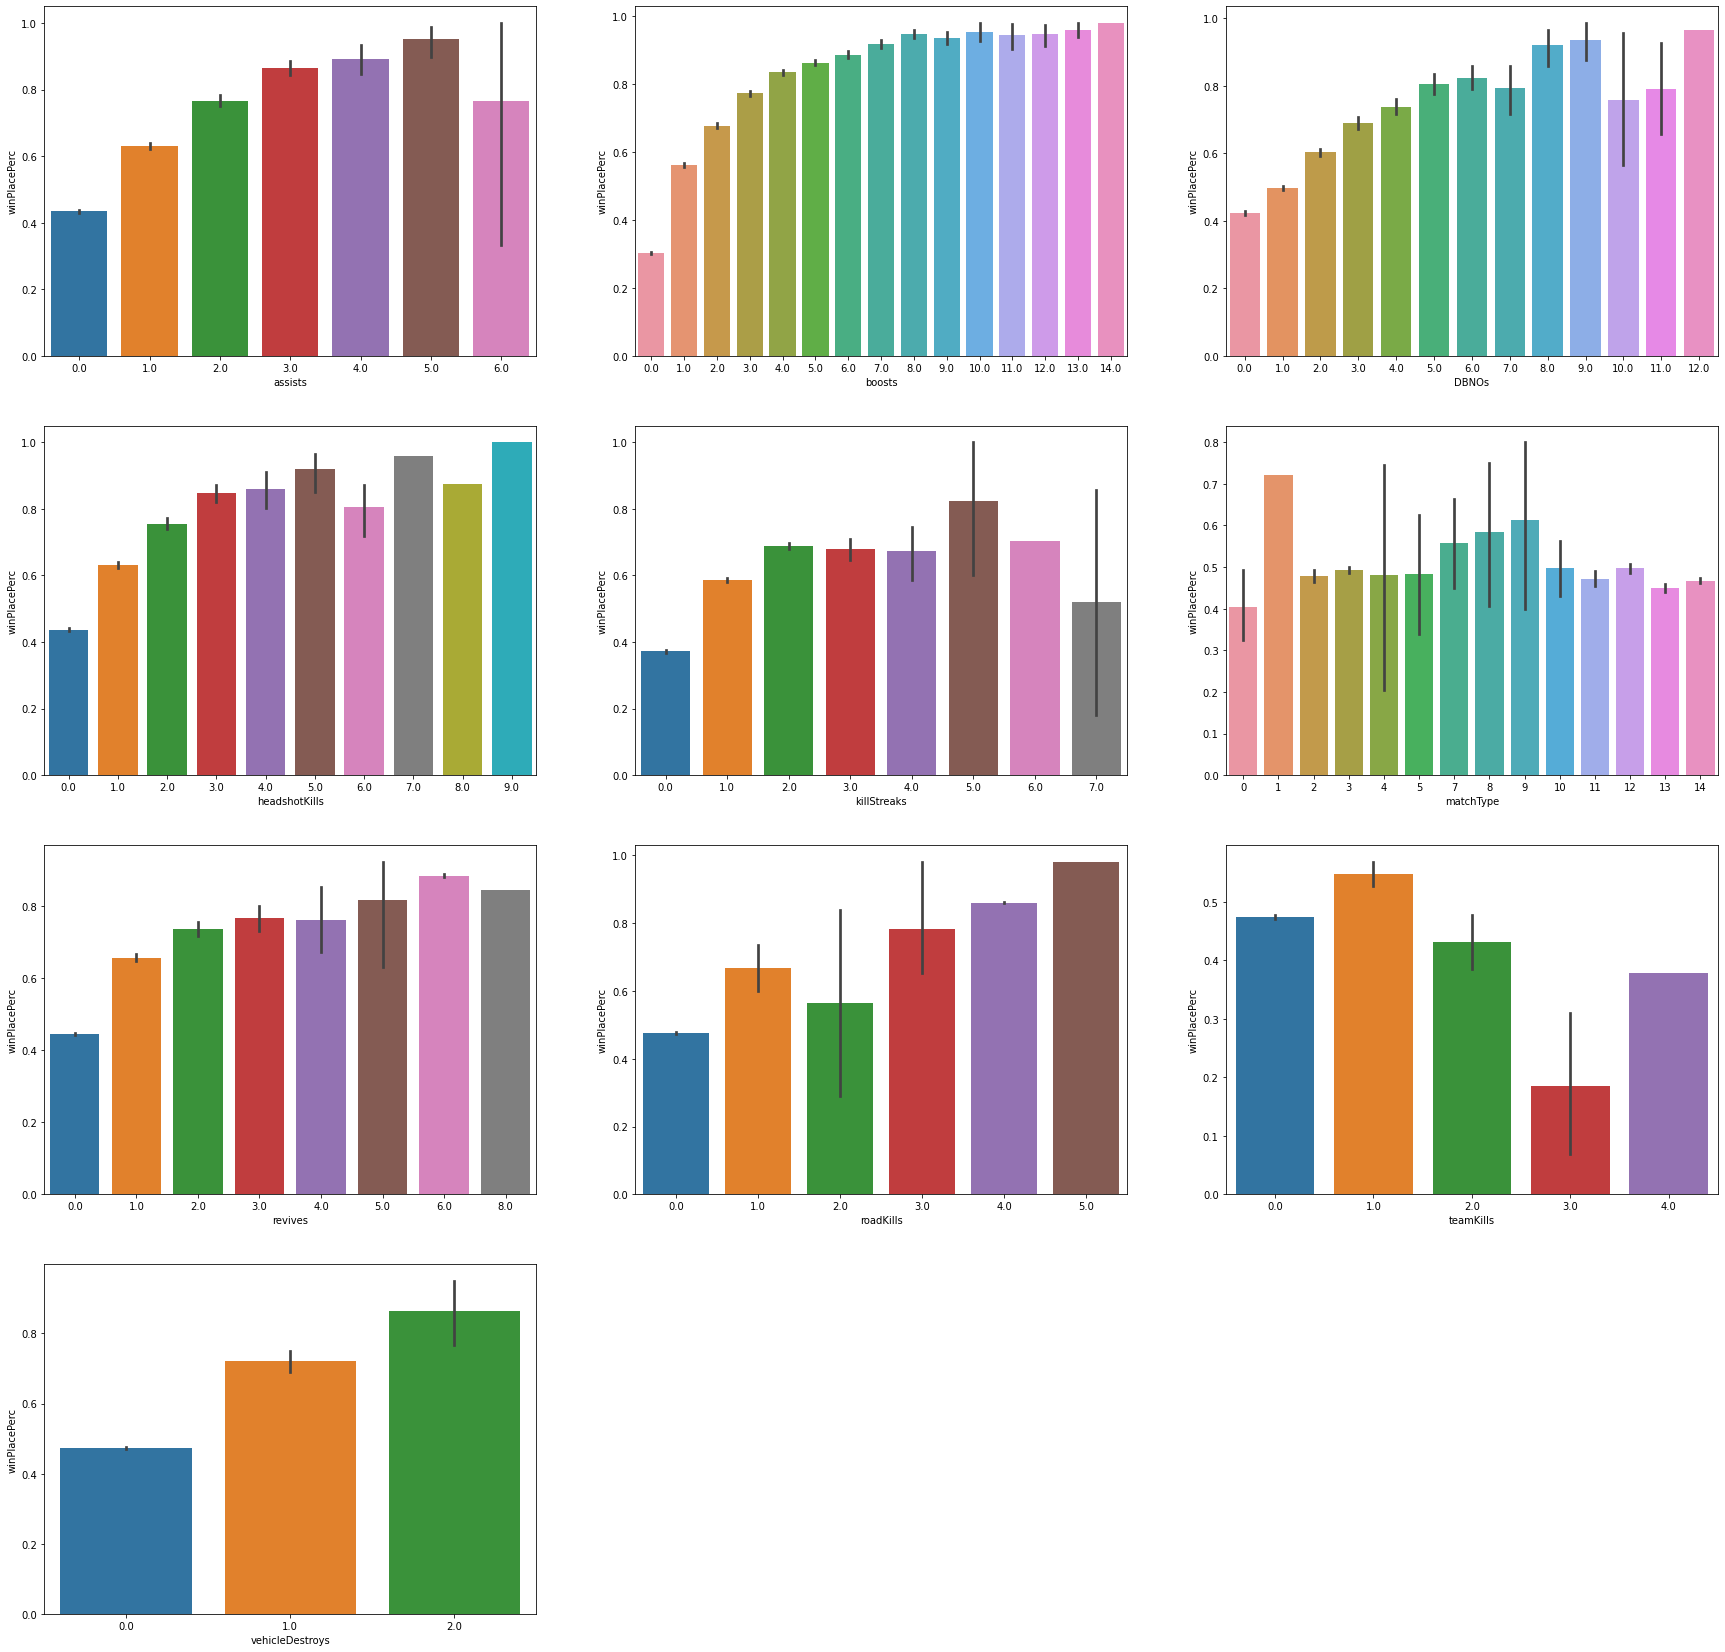

In [165]:
# Probability between discreate valu & target value

plt.figure(figsize=(30,45))
for i in range(len(discrete_data.columns)):
  plt.subplot(6, 3, i + 1)
  sns.barplot(x =data[discrete_data.columns[i]], y = data["winPlacePerc"])
plt.show()

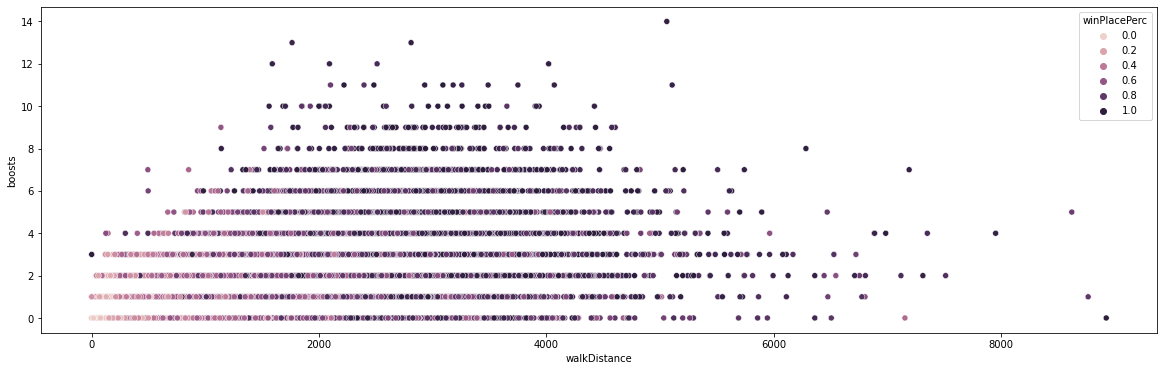

In [171]:
plt.figure(figsize=(20,6))
sns.scatterplot(data=data,x="walkDistance",y="boosts",hue="winPlacePerc")

**Remove Outlier's** 

In [ ]:
# data[data["damageDealt"] < 2000]
# data[data["heals"] < 30]
# data[data["kills"] < 15]
# data[data["longestKill"] < 500]
# data[data["rankPoints"] < 3500]
# data[data["rideDistance"] < 15000]
# data[data["walkDistance"] < 10000]
# data[data["weaponsAcquired"] < 28]
# data[data["swimDistance"] < 900]

data = data.query("(damageDealt < 2000) & (heals < 30) & (kills <15) & (longestKill < 500) & (rankPoints < 15000) & (walkDistance <= 9000) & (weaponsAcquired < 28) & (swimDistance < 900)")

In [189]:
# Split data inot dependent variable & target variable 

x = data.drop(["winPlacePerc"],axis=1)
y = data["winPlacePerc"]

In [190]:
# probability data convert to binary data
 
y = y.apply(lambda x : 1 if x >= 0.5 else 0)

In [192]:
# Scaling the data between 0 to 1

scale = StandardScaler()
x = scale.fit_transform(x)

# Model building

In [193]:
# Divide data into train & test

x_train,x_test, y_train,y_test = train_test_split(x,y,random_state=10)

In [194]:
def run_model(model):
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  print(model)
  print("Train Score =", model.score(x_train,y_train))
  print("Test Score  =", model.score(x_test,y_test))
  print(confusion_matrix(y_test,y_pred))

In [195]:
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

rd = RandomForestClassifier()
ad = AdaBoostClassifier()
gb = GradientBoostingClassifier()
xgb = xgb.XGBRFClassifier()

models = [rd,ad,gb,xgb]
for i in models:
  run_model(i)
  print("=======================")

RandomForestClassifier()
Train Score = 0.999952792333475
Test Score  = 0.9325969980175588
[[3452  243]
 [ 233 3134]]
AdaBoostClassifier()
Train Score = 0.9250814332247557
Test Score  = 0.9250920419144718
[[3439  256]
 [ 273 3094]]
GradientBoostingClassifier()
Train Score = 0.9358919888589907
Test Score  = 0.9316057774001699
[[3441  254]
 [ 229 3138]]
XGBRFClassifier()
Train Score = 0.9084643346079403
Test Score  = 0.9041348060039649
[[3450  245]
 [ 432 2935]]


- **Without Remove Outiler** GradientBoosting Score is 0.91
- **after Remove Outiler's** GradientBoosting Score is 0.93

- RandomForestClassifier model train score is greater than test scores so it's called overfitted model
- GradientBoostingClassifier has Best score achive
- Gradient Boosting classifiers is to **minimize the loss**, or the difference between the actual class value of the training example and the predicted class value.

# **Hyperparameter Tuning**

In [ ]:
gbm = GradientBoostingClassifier()
param = {
    "loss":['log_loss', 'deviance', 'exponential'],
    "learning_rate": [0.1, 0.5, 0.01,0.03, 0.001],
     "n_estimators":[100,50,200,300,500],
     "subsample":[0.3,0.5,0.8,1.0],
     "criterion":['friedman_mse',"squared_error", "mse"], 
     "max_depth":[3,5],
     "min_impurity_decrease" :[0.0,0.01,0.1,0.001]
}

gb_cv = RandomizedSearchCV(gbm,param_distributions=param,cv=5,n_jobs=-1)
run_model(gb_cv)

In [206]:
# Best Parameter for GradientBoost model

gb_cv.best_params_

{'subsample': 1.0,
 'n_estimators': 500,
 'min_impurity_decrease': 0.001,
 'max_depth': 3,
 'loss': 'exponential',
 'learning_rate': 0.5,
 'criterion': 'friedman_mse'}

## Prediction

In [52]:
pd.DataFrame(gb.predict_proba(x_test))  # Wining prediction probabilaty based on x_test data

,0,1
0,0.012857,0.987143
1,0.960373,0.039627
2,0.121285,0.878715
3,0.638572,0.361428
4,0.683097,0.316903
...,...,...
7064,0.995279,0.004721
7065,0.900549,0.099451
7066,0.995666,0.004334
7067,0.994622,0.005378
